In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('train.csv')
data = dataset.values

x = data[:, :16]
y = data[:, 16]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (17996, 17)
Dimensionalitat de les entrades X (17996, 16)
Dimensionalitat de l'atribut Y (17996,)


In [3]:
dataset.info()
#Tenim valors NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [4]:
dataset.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)      60.000   
1                 Boston                           Hitch a Ride      54.000   
2          The Raincoats                     No Side to Fall In      35.000   
3                   Deno             Lingo (feat. J.I & Chunkz)      66.000   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered      53.000   

   danceability  energy    key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564  1.000    -4.964     1        0.049         0.017   
1         0.382   0.814  3.000    -7.230     1        0.041         0.001   
2         0.434   0.614  6.000    -8.334     1        0.052         0.486   
3         0.853   0.597 10.000    -6.528     0        0.056         0.021   
4         0.167   0.975  2.000    -4.279     1        0.216         0.000   

   instrumentalness  liveness  valence   tempo  duration_in min/ms  \
0               NaN     0.085    0.899 134.071          234596.000   
1             0.004     0.101    0.569 116.454          251733.000   
2             0.000     0.394    0.787 147.681          109667.000   
3               NaN     0.122    0.569 107.033          173968.000   
4             0.016     0.172    0.092 199.060          229960.000   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [5]:
#depurem el DF
dataset = dataset.fillna(value = -1)
dataset.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)      60.000   
1                 Boston                           Hitch a Ride      54.000   
2          The Raincoats                     No Side to Fall In      35.000   
3                   Deno             Lingo (feat. J.I & Chunkz)      66.000   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered      53.000   

   danceability  energy    key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564  1.000    -4.964     1        0.049         0.017   
1         0.382   0.814  3.000    -7.230     1        0.041         0.001   
2         0.434   0.614  6.000    -8.334     1        0.052         0.486   
3         0.853   0.597 10.000    -6.528     0        0.056         0.021   
4         0.167   0.975  2.000    -4.279     1        0.216         0.000   

   instrumentalness  liveness  valence   tempo  duration_in min/ms  \
0            -1.000     0.085    0.899 134.071          234596.000   
1             0.004     0.101    0.569 116.454          251733.000   
2             0.000     0.394    0.787 147.681          109667.000   
3            -1.000     0.122    0.569 107.033          173968.000   
4             0.016     0.172    0.092 199.060          229960.000   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [6]:
from sklearn import preprocessing
#Codifiquem el nom dels artistes
encoder = preprocessing.LabelEncoder()
dataset["Artist Name"]=encoder.fit_transform(dataset["Artist Name"])
#treiem columna Track Name ja que no ens es necesari
del dataset["Track Name"]
dataset.head()

Artist Name  Popularity  danceability  energy    key  loudness  mode  \
0         1182      60.000         0.854   0.564  1.000    -4.964     1   
1         1092      54.000         0.382   0.814  3.000    -7.230     1   
2         7899      35.000         0.434   0.614  6.000    -8.334     1   
3         1987      66.000         0.853   0.597 10.000    -6.528     0   
4         6283      53.000         0.167   0.975  2.000    -4.279     1   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0        0.049         0.017            -1.000     0.085    0.899 134.071   
1        0.041         0.001             0.004     0.101    0.569 116.454   
2        0.052         0.486             0.000     0.394    0.787 147.681   
3        0.056         0.021            -1.000     0.122    0.569 107.033   
4        0.216         0.000             0.016     0.172    0.092 199.060   

   duration_in min/ms  time_signature  Class  
0          234596.000               4      5  
1          251733.000               4     10  
2          109667.000               4      6  
3          173968.000               4      5  
4          229960.000               4     10

In [7]:
x = dataset.values[:, :15]
y = dataset.values[:, 15]

<IPython.core.display.Javascript object>


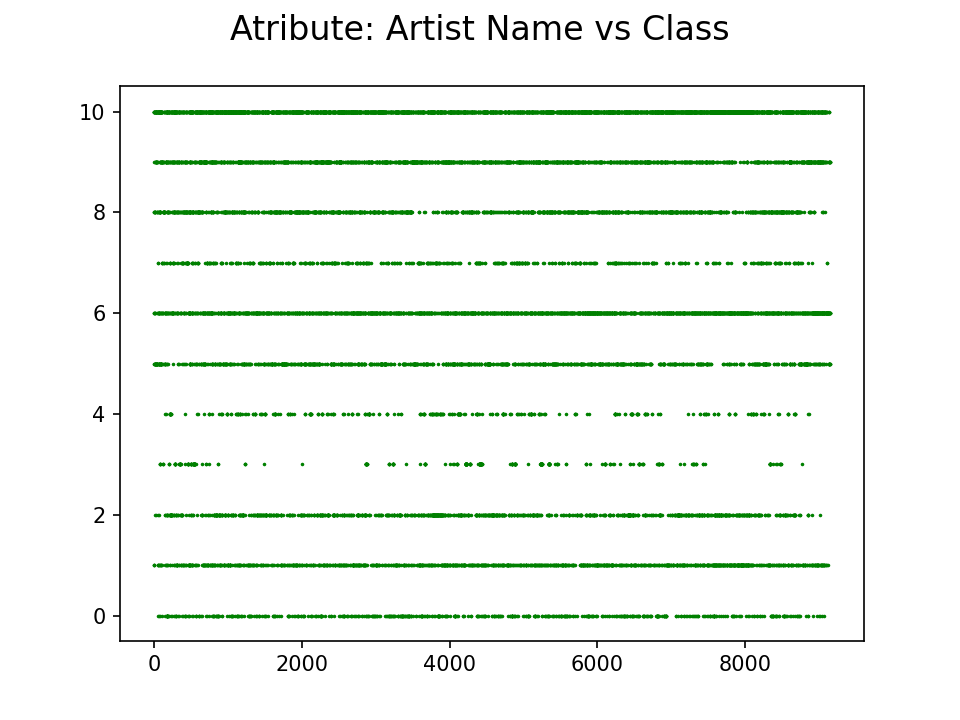

<IPython.core.display.Javascript object>


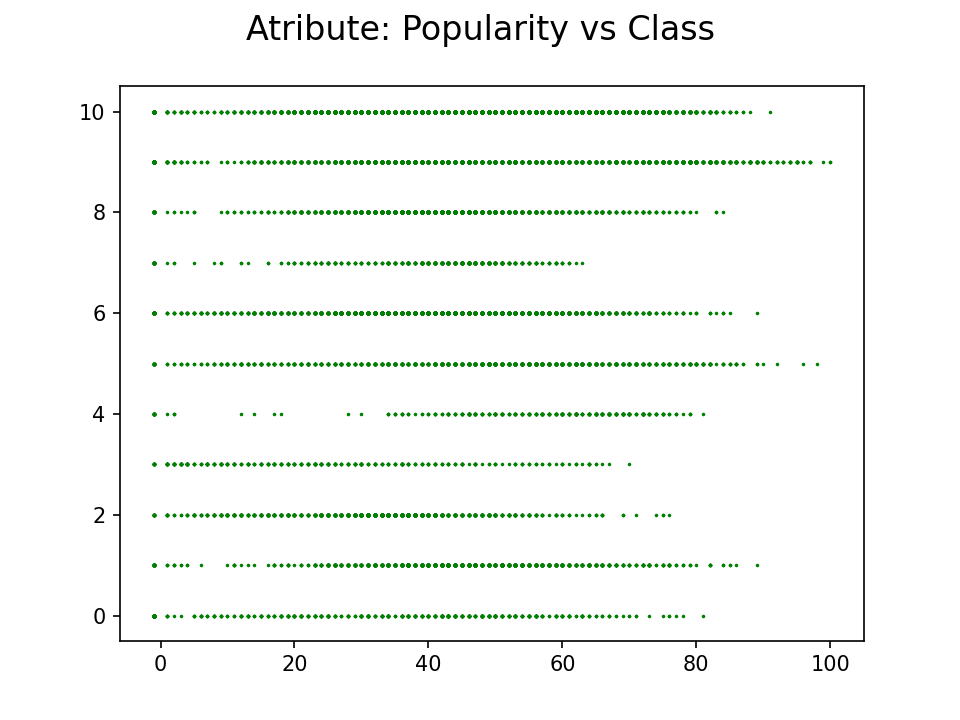

<IPython.core.display.Javascript object>


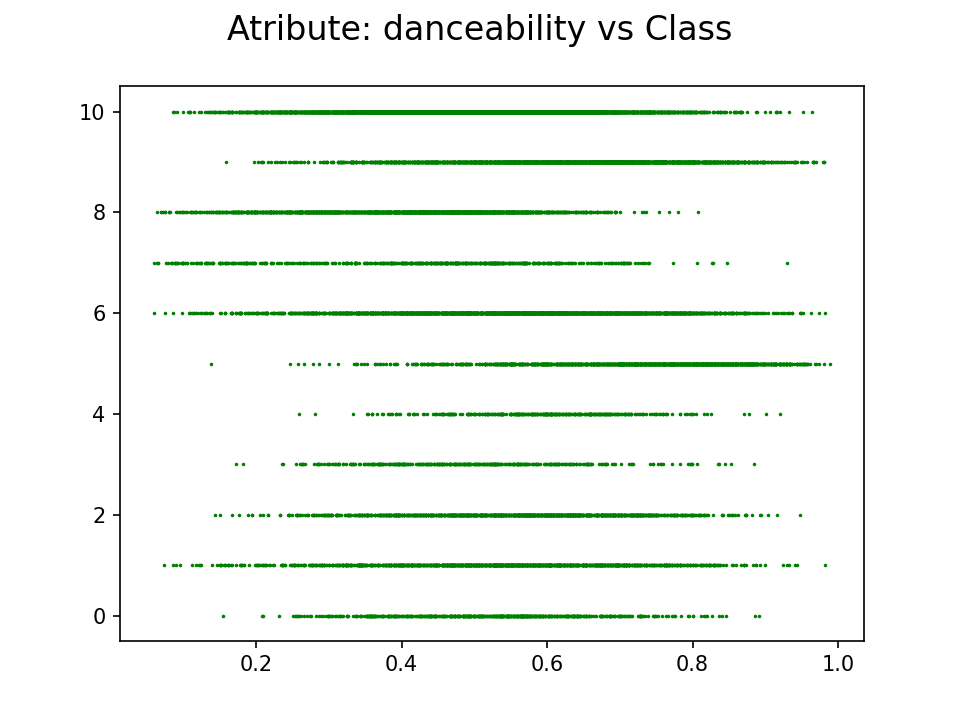

<IPython.core.display.Javascript object>


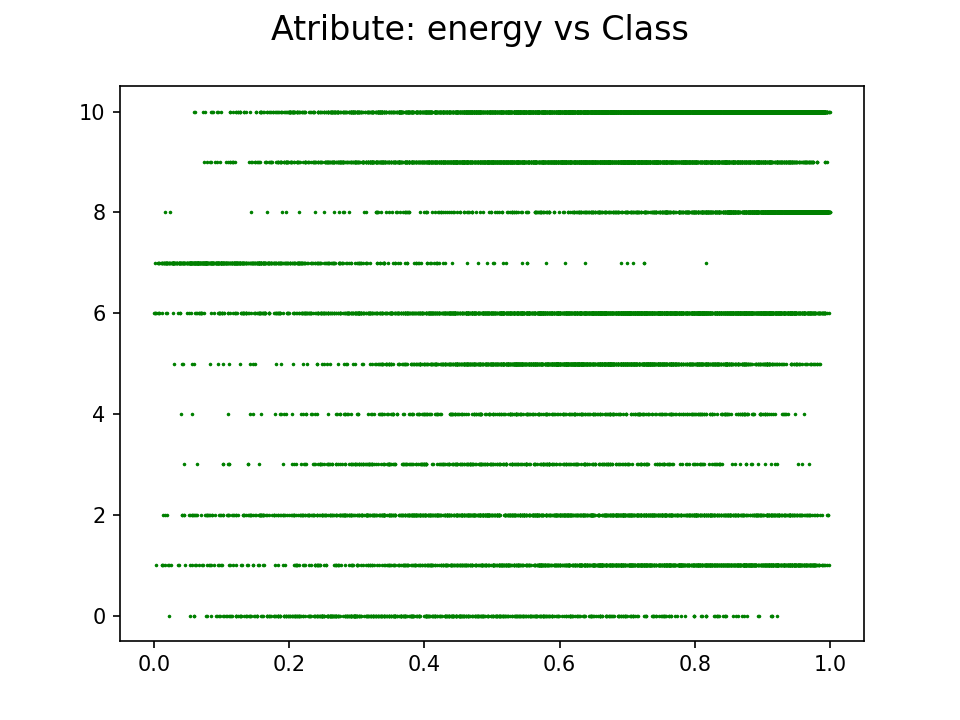

<IPython.core.display.Javascript object>


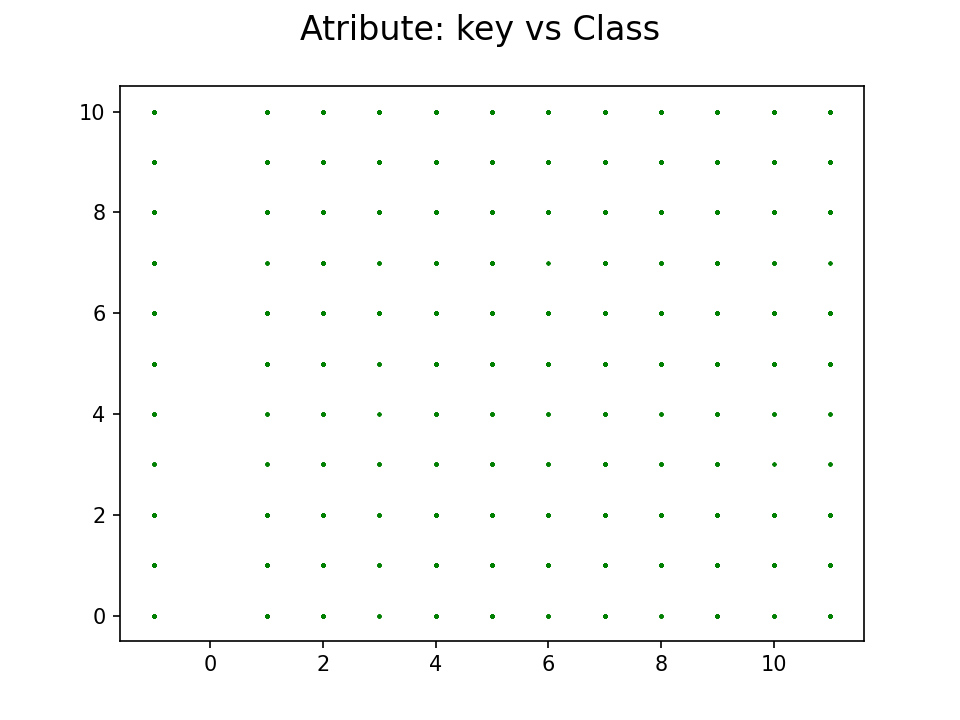

<IPython.core.display.Javascript object>


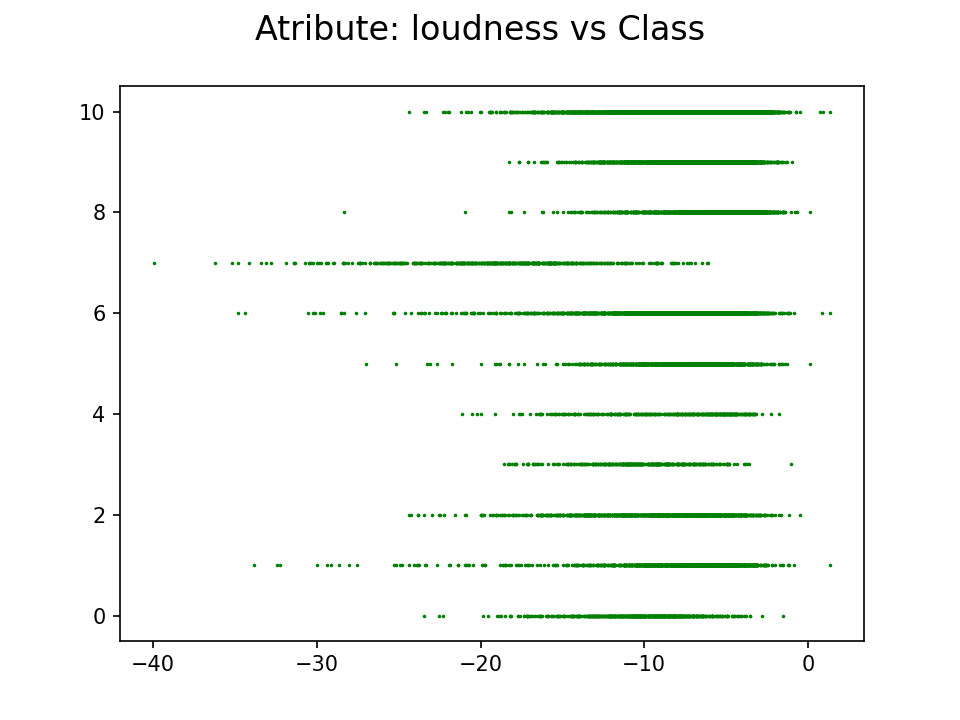

<IPython.core.display.Javascript object>


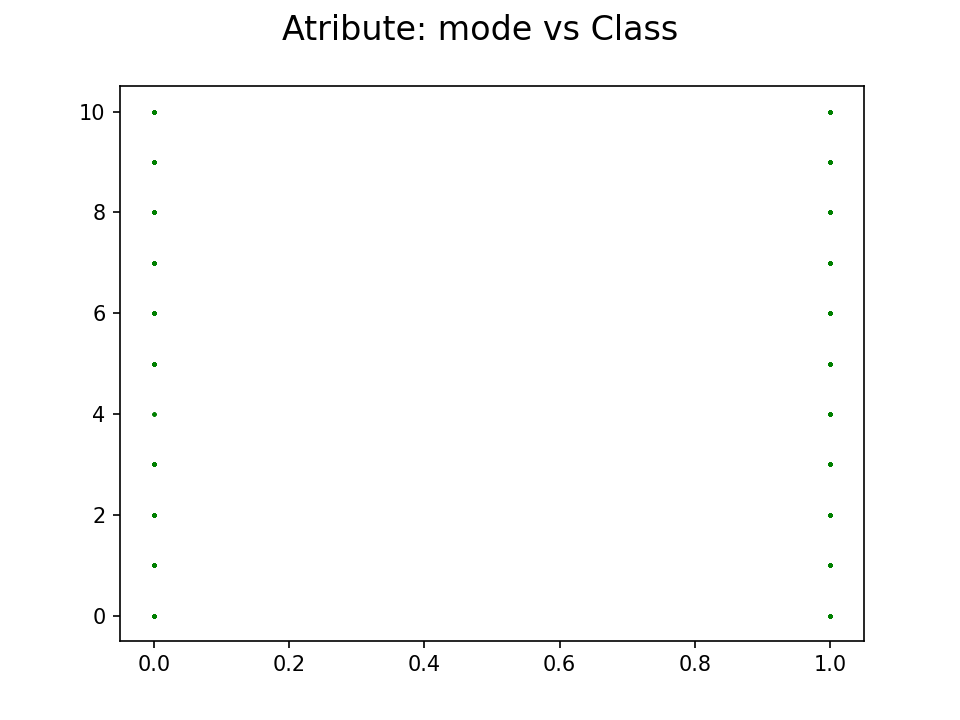

<IPython.core.display.Javascript object>


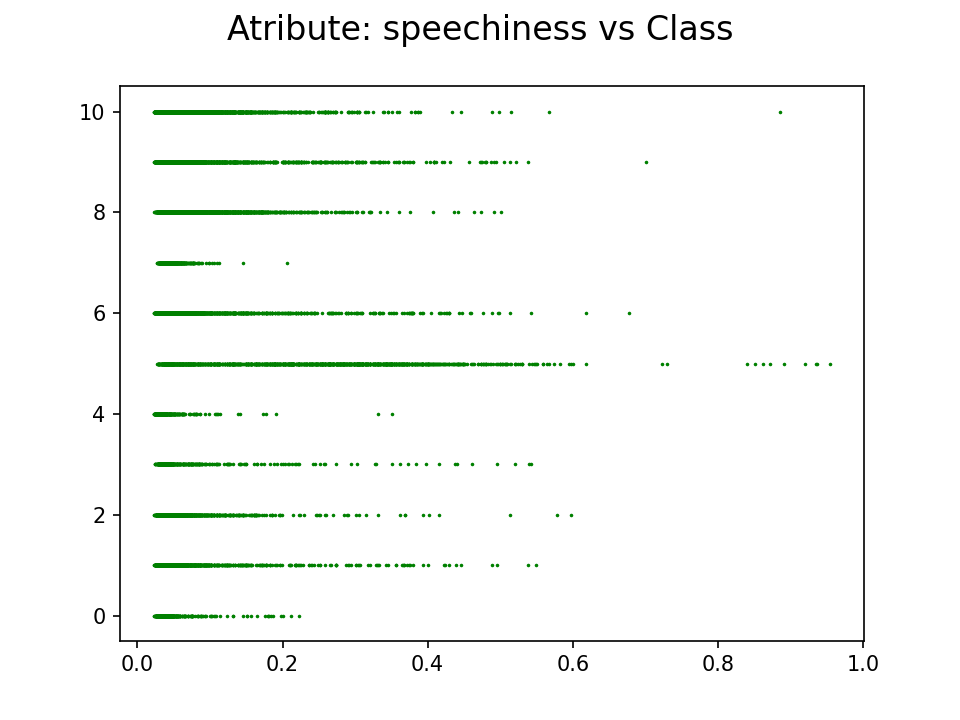

<IPython.core.display.Javascript object>


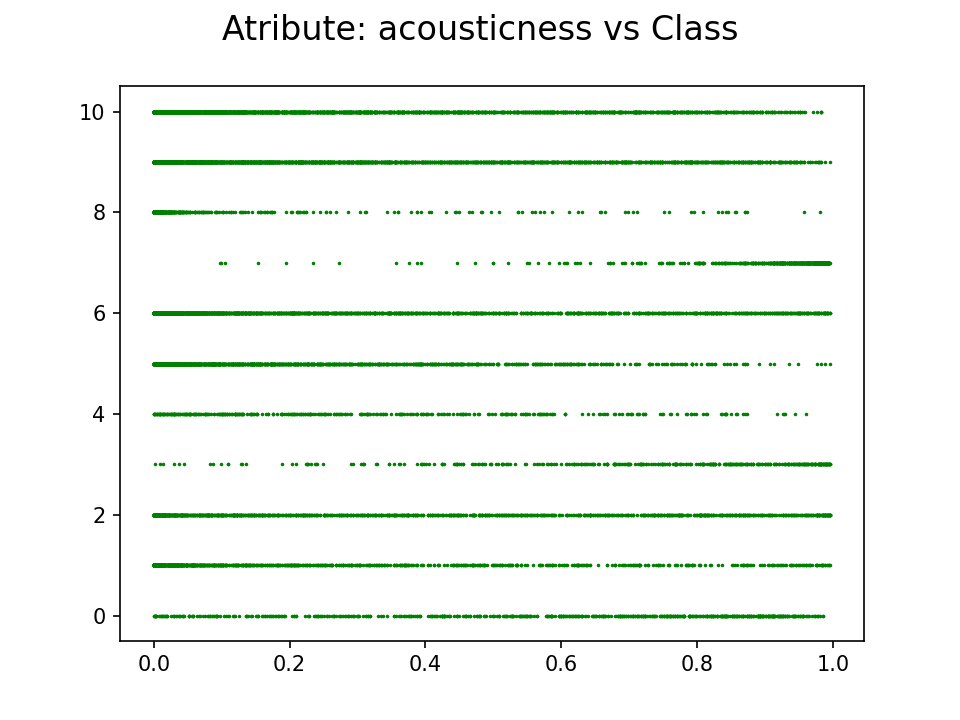

<IPython.core.display.Javascript object>


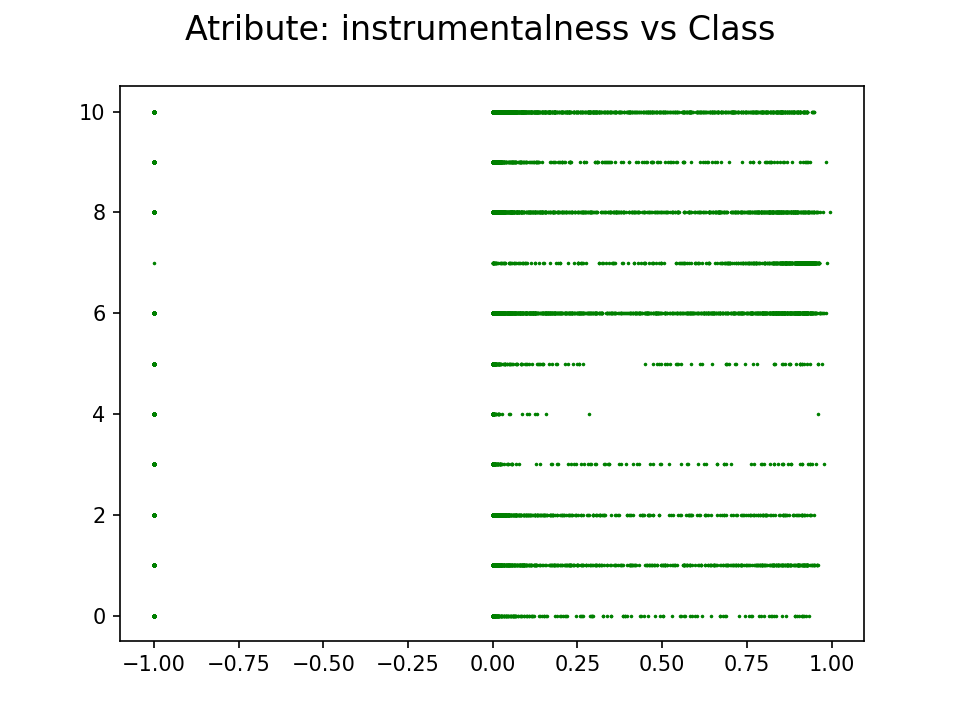

<IPython.core.display.Javascript object>


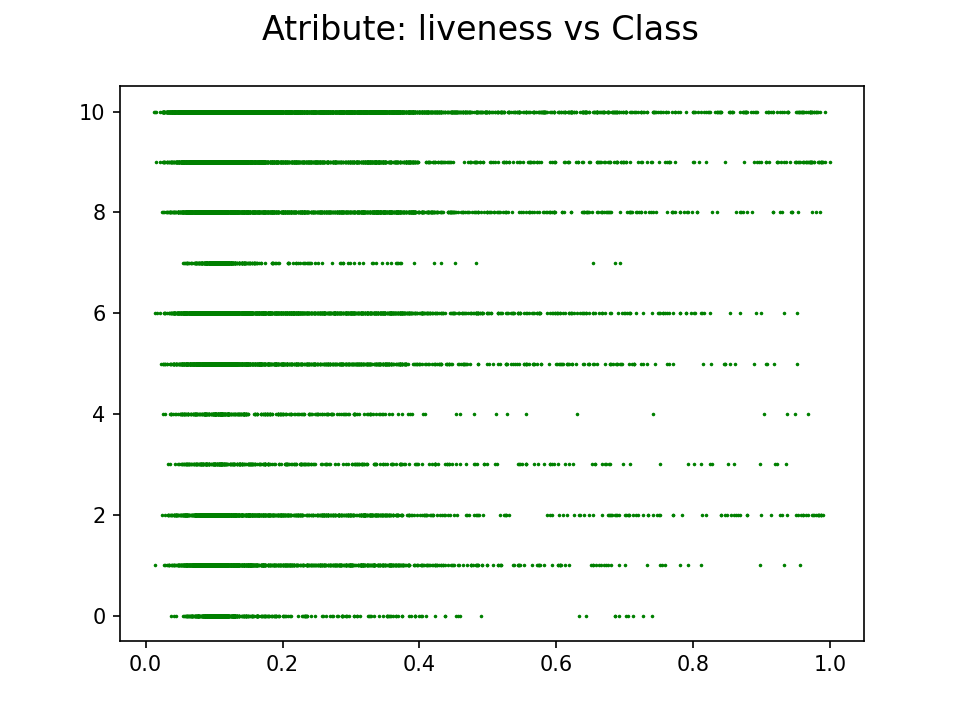

<IPython.core.display.Javascript object>


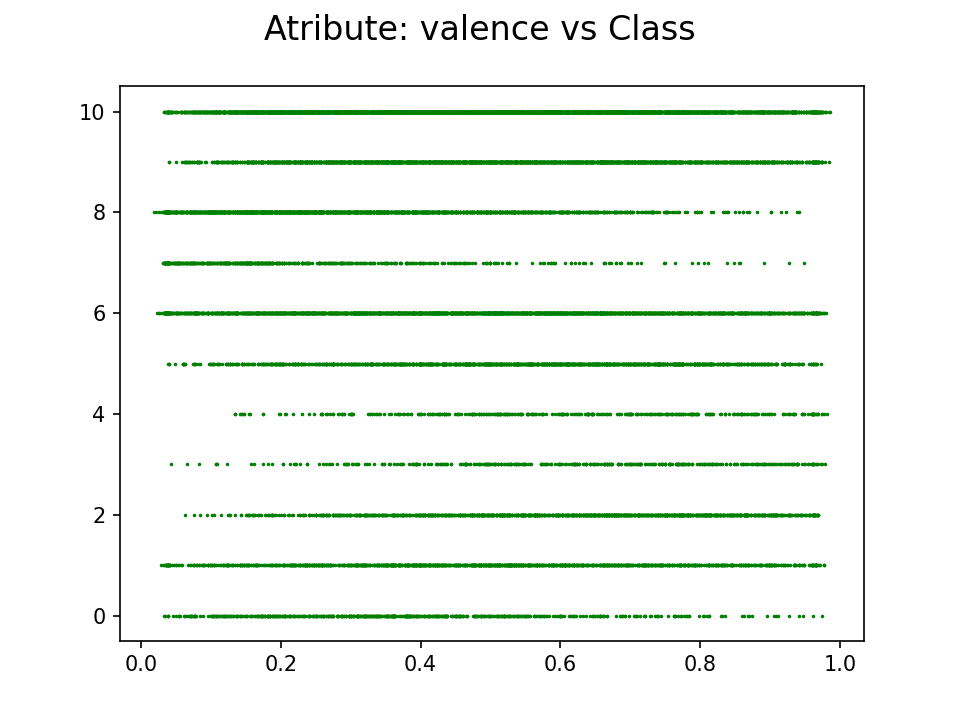

<IPython.core.display.Javascript object>


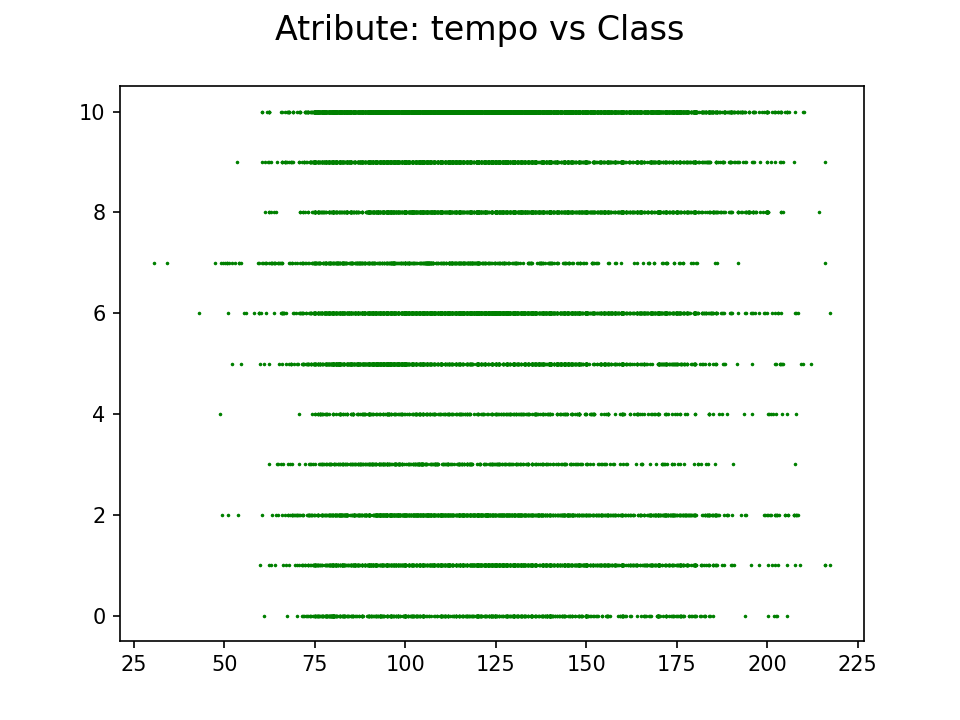

<IPython.core.display.Javascript object>


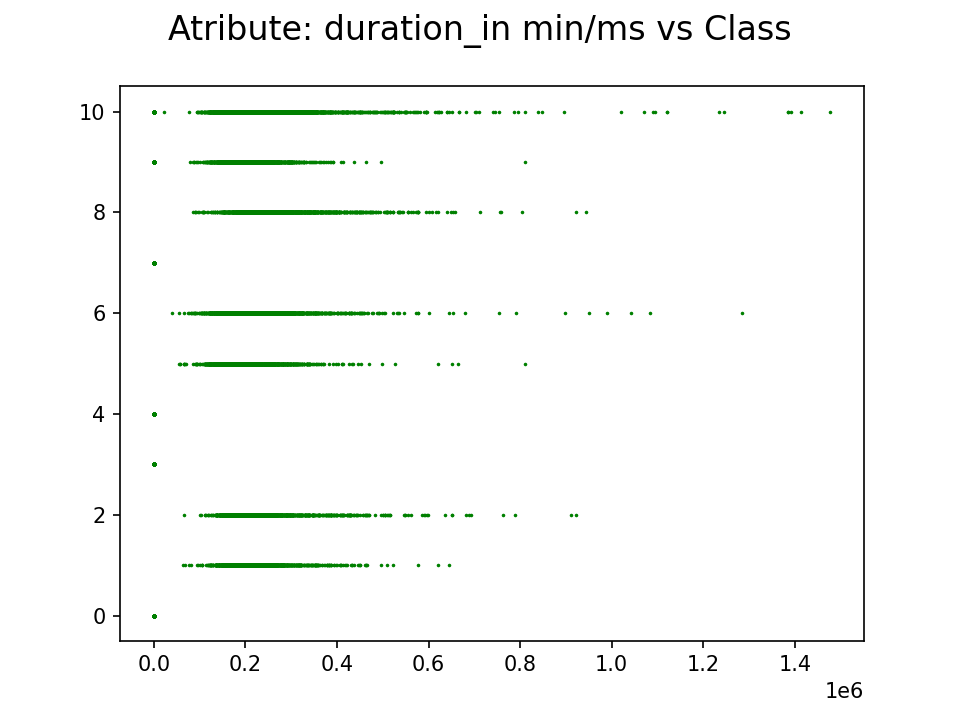

<IPython.core.display.Javascript object>


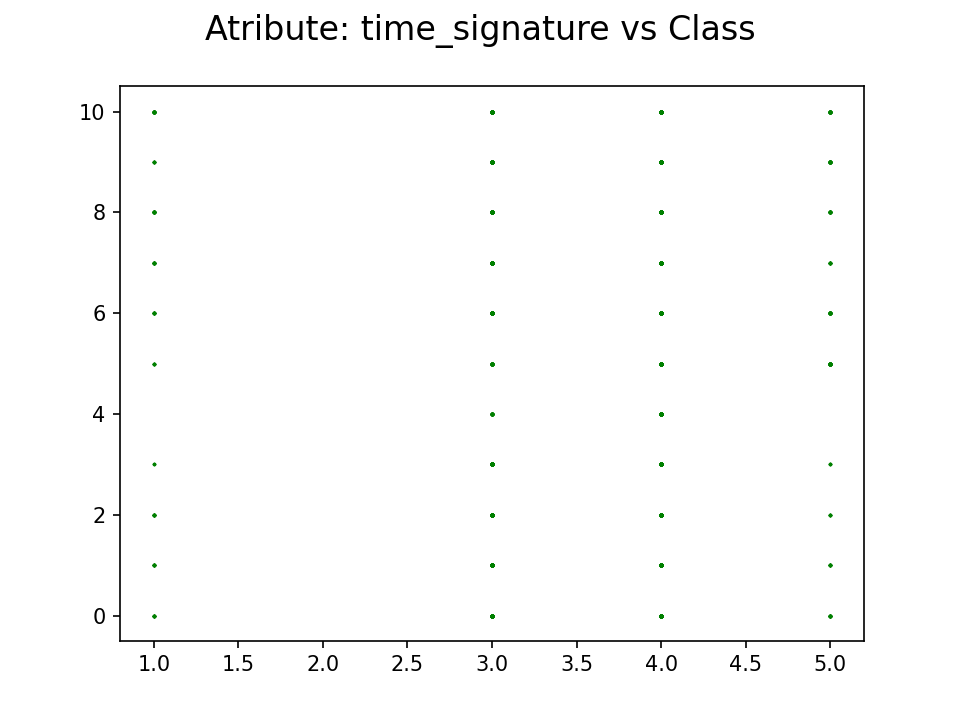

In [7]:
for i in range(0,15):
    plt.figure()
    plt.suptitle('Atribute: '+ dataset.axes[1][i] +' vs Class', fontsize=16)
    plt.scatter(x[:,i], y, s=0.5, c="green")

In [8]:
import mglearn
fig, axes = plt.subplots(5,3,figsize=(9,12))
ax = axes.ravel()

for i in range(15):
    ax[i].hist(dataset.iloc[:,i], bins=15, color = 'blue')
    ax[i].set_title(list(dataset)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")

fig.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


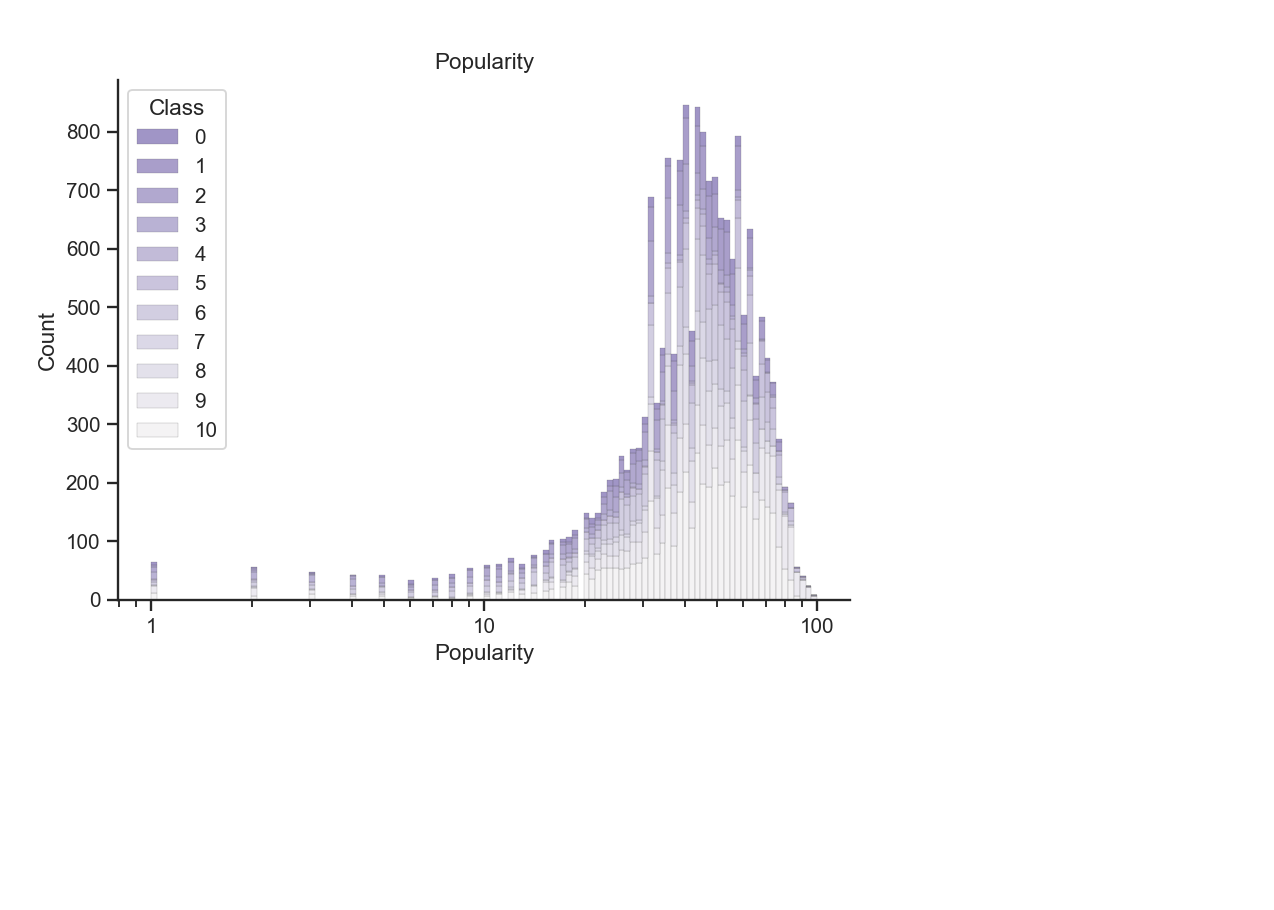

C:\Users\Bernat\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


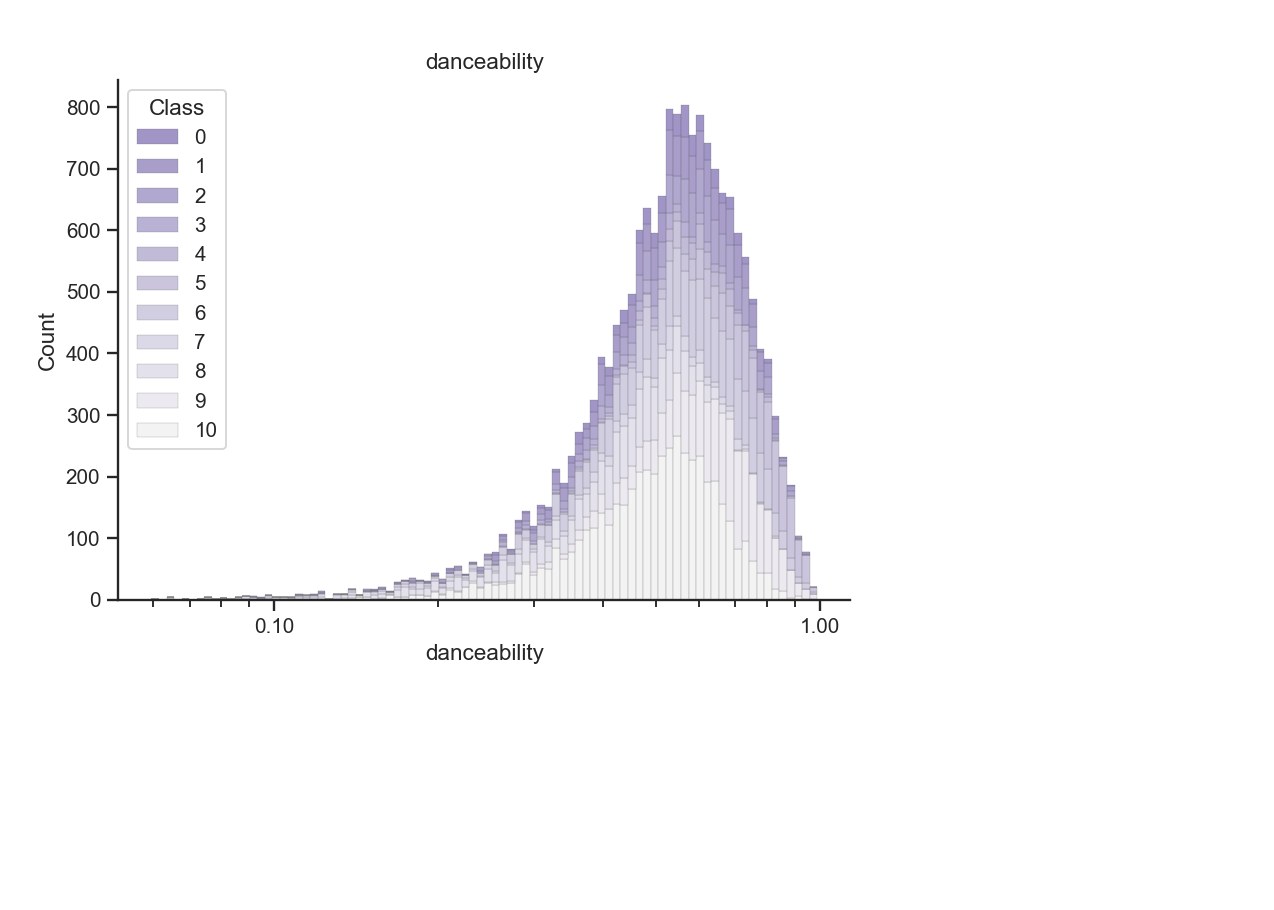

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


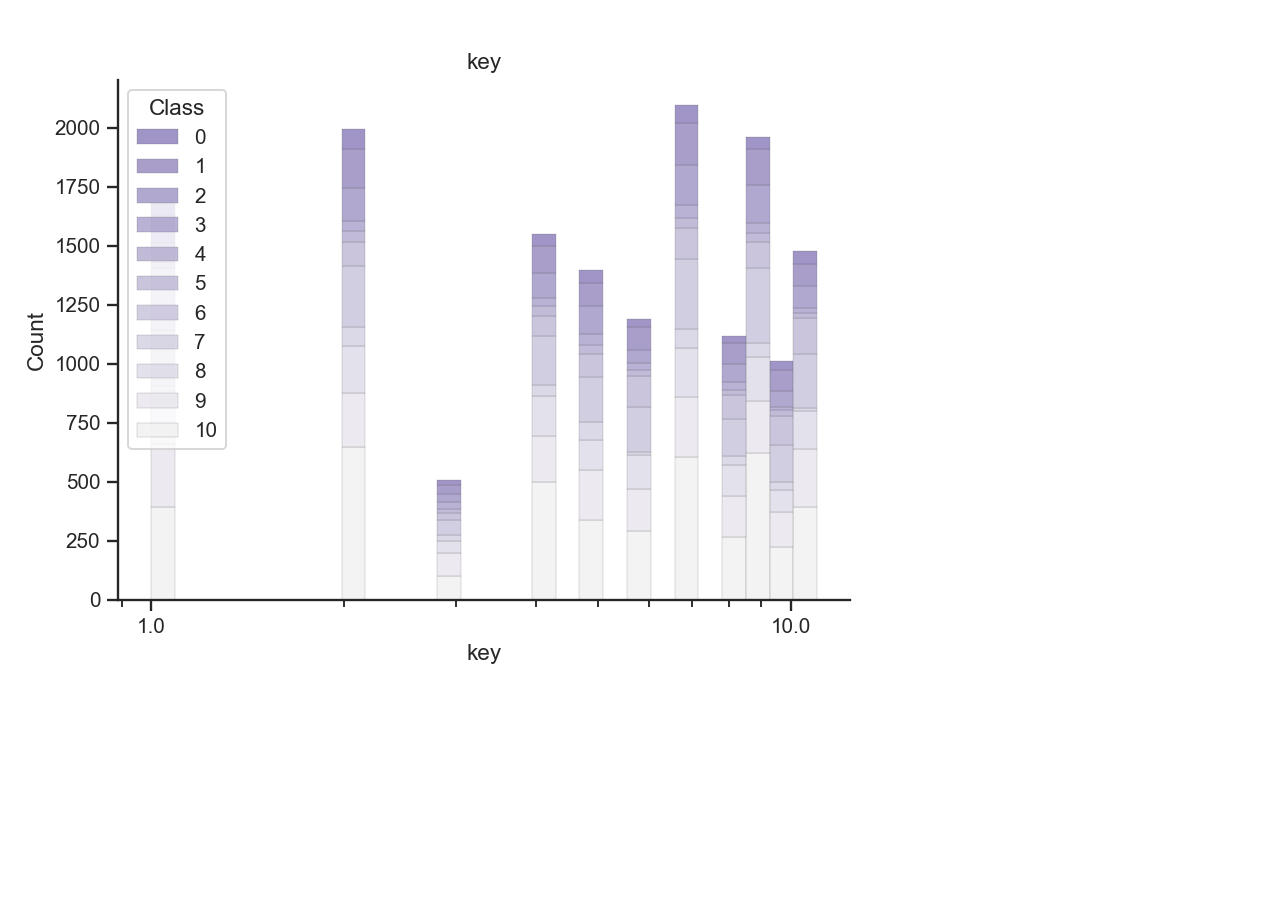

C:\Users\Bernat\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


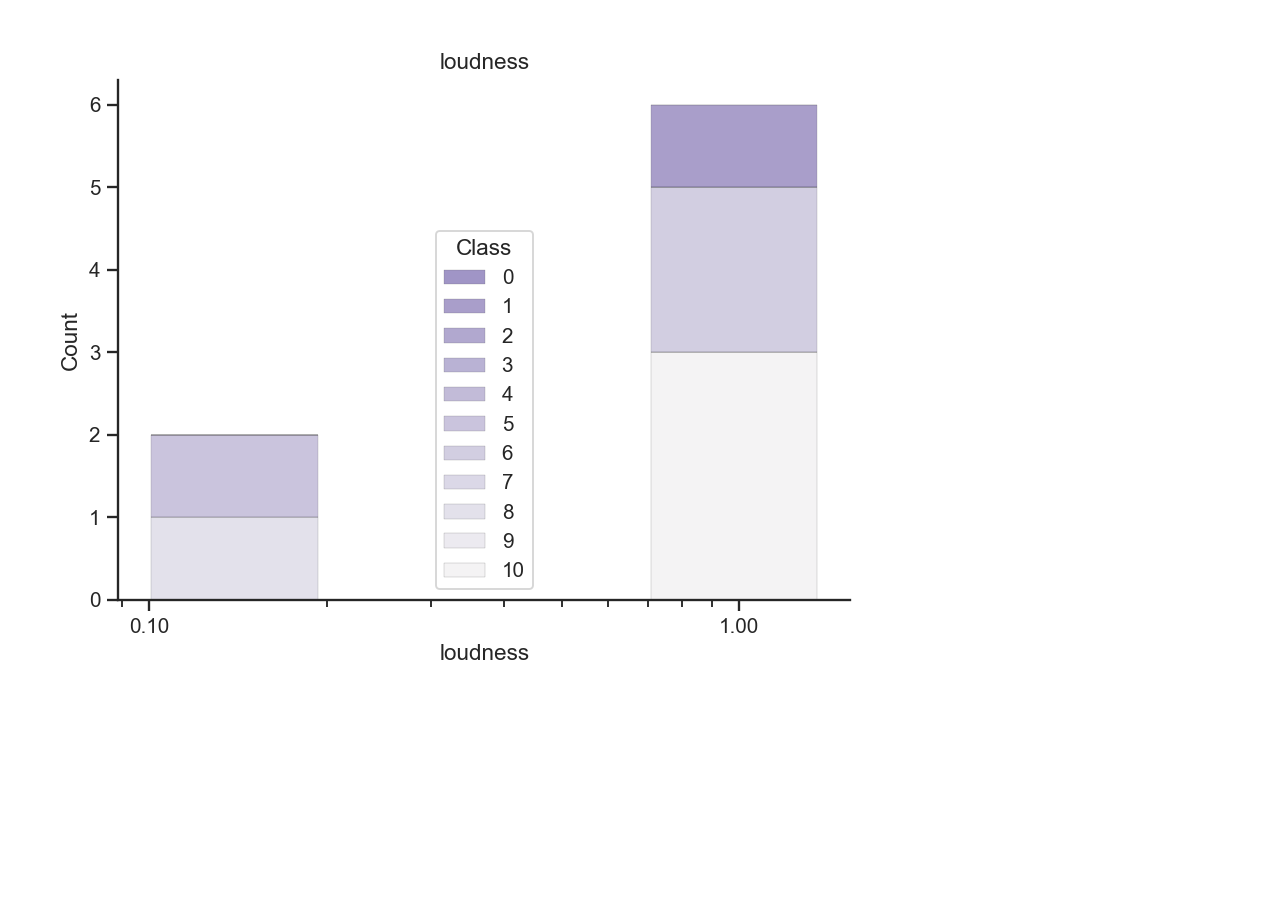

C:\Users\Bernat\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


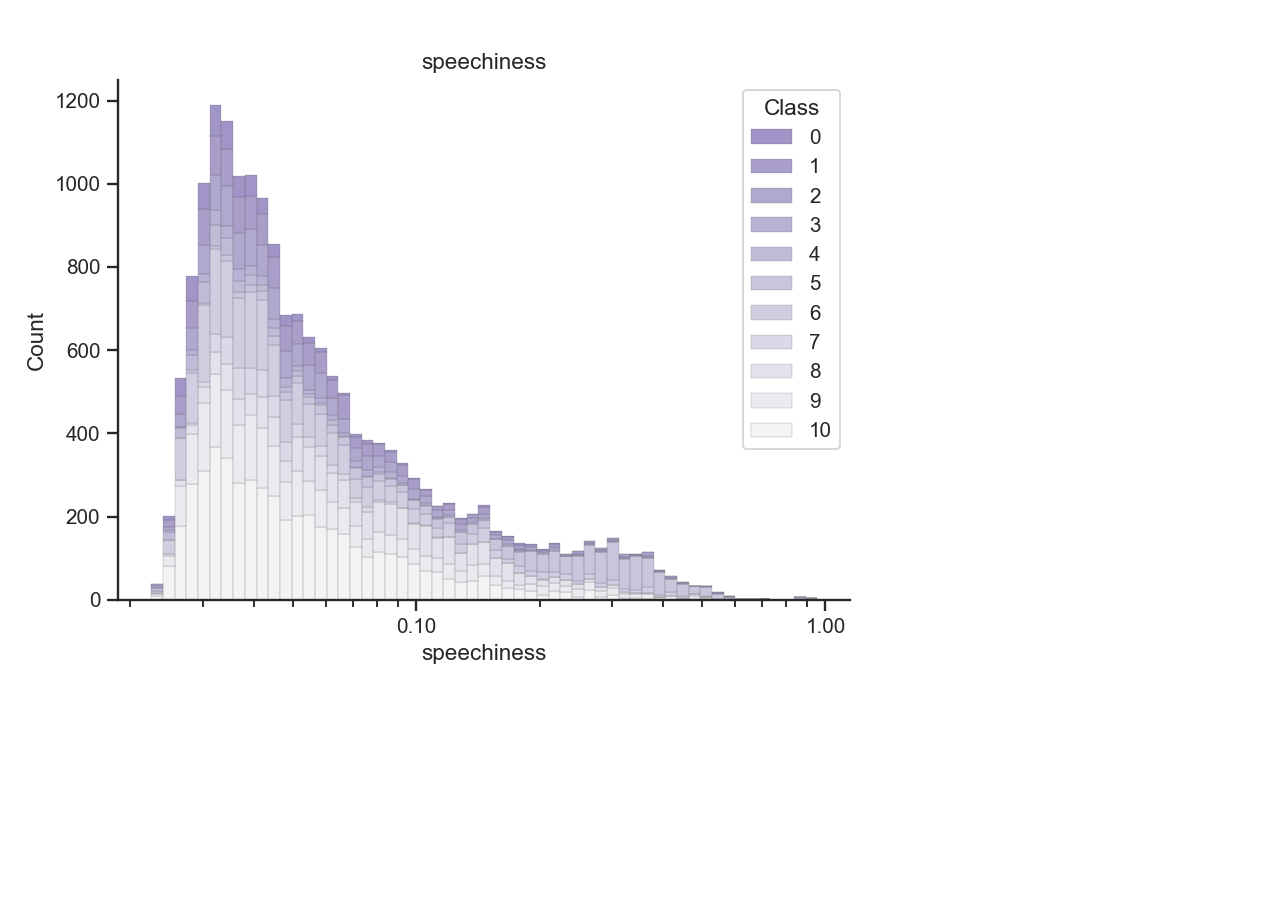

<IPython.core.display.Javascript object>

C:\Users\Bernat\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


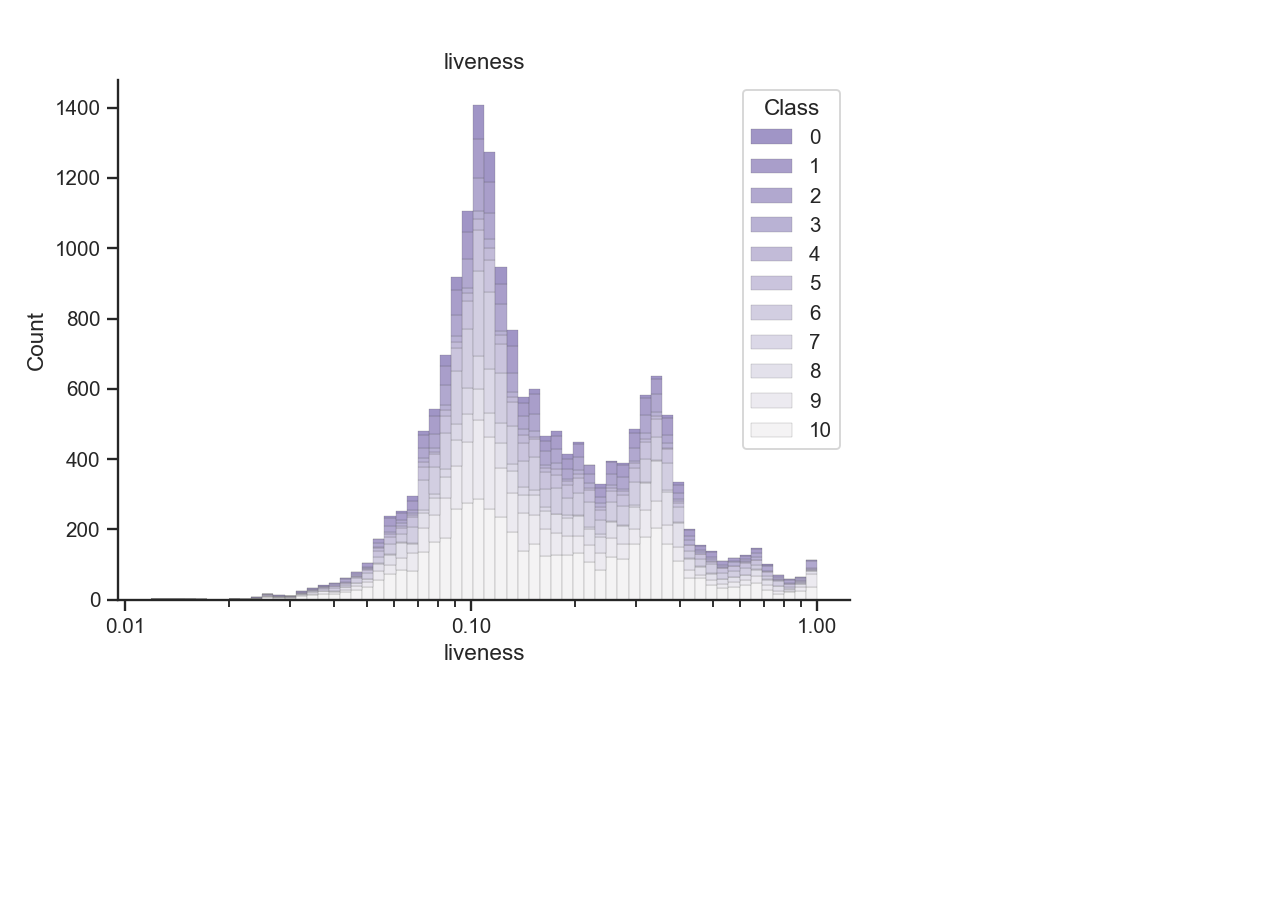

<IPython.core.display.Javascript object>


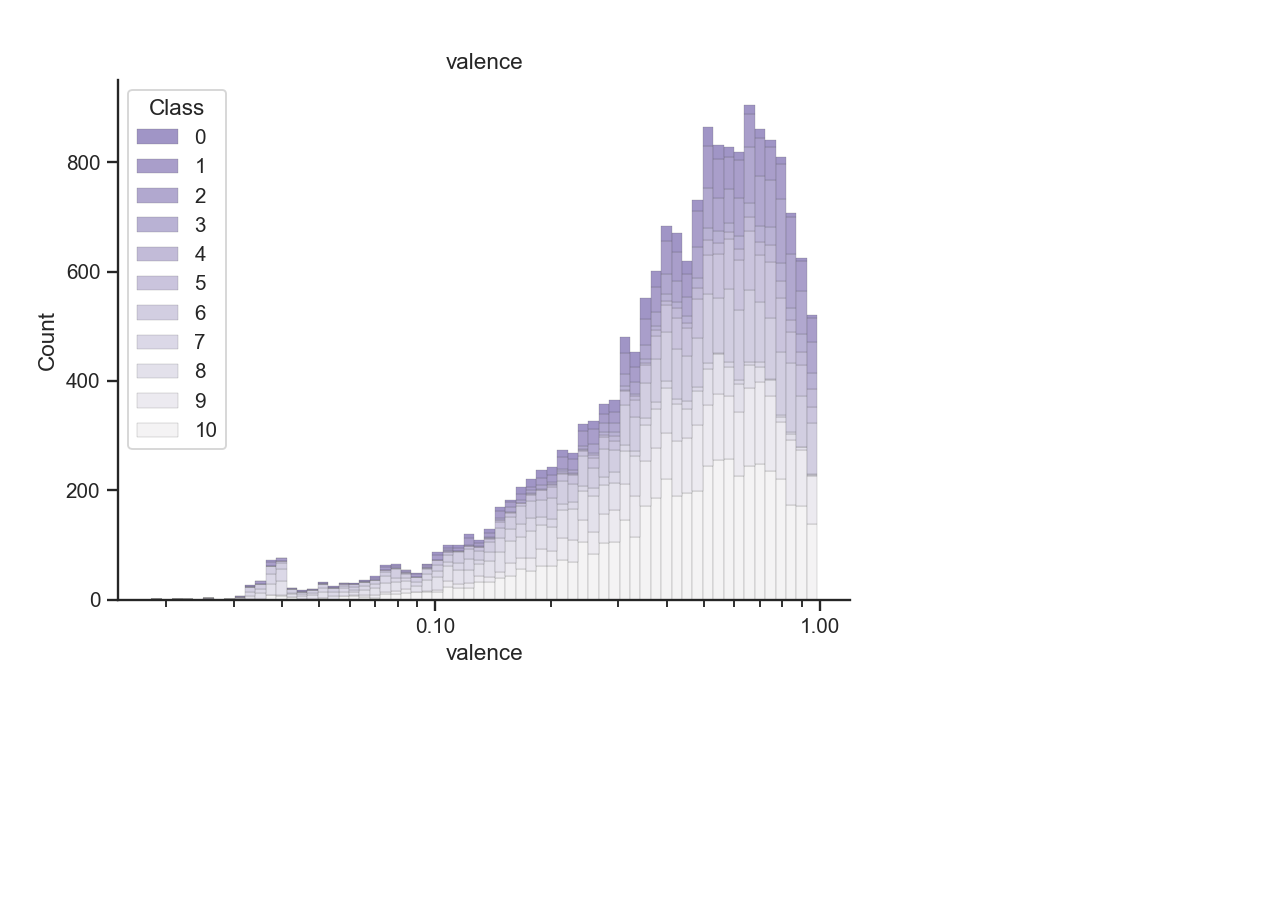

<IPython.core.display.Javascript object>


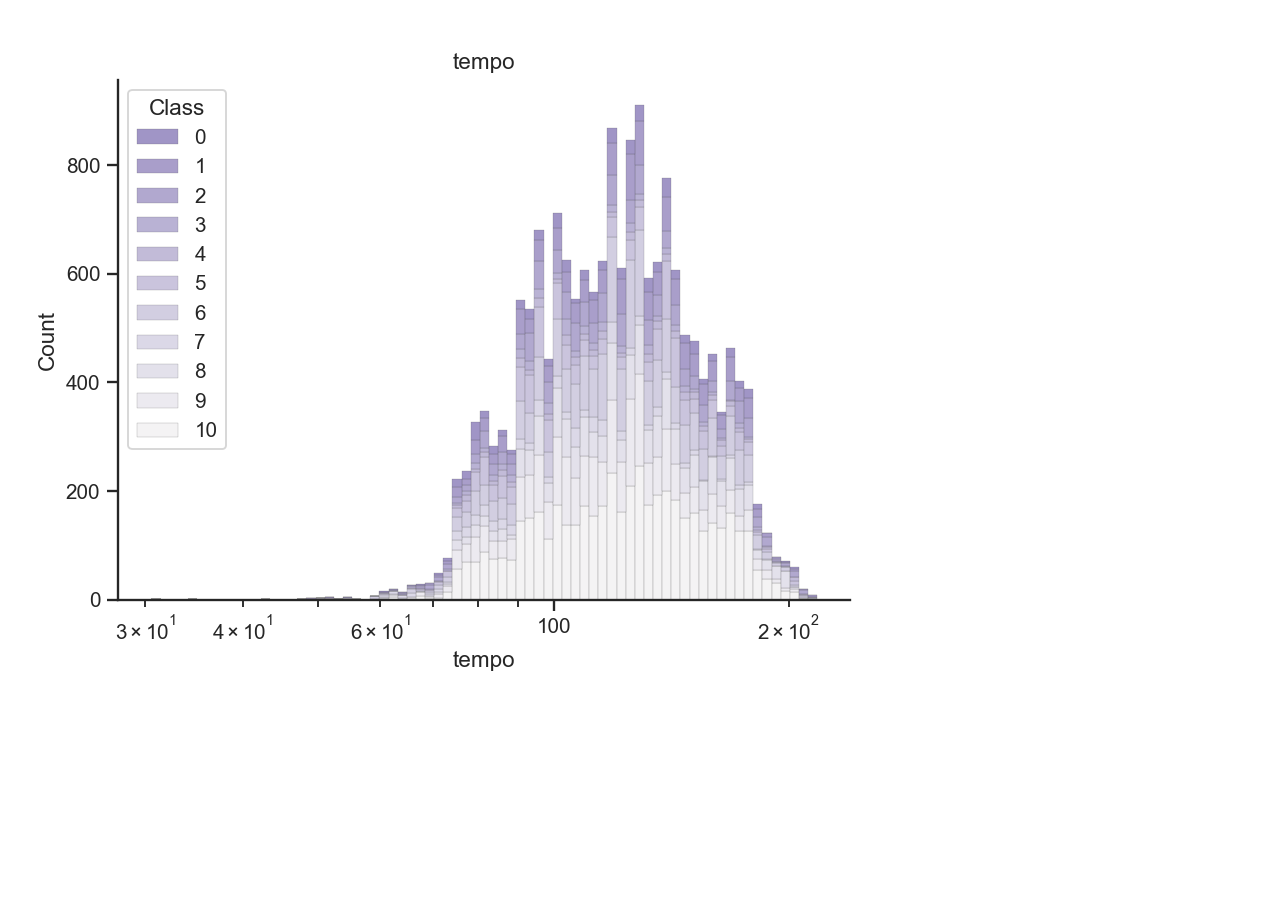

<IPython.core.display.Javascript object>


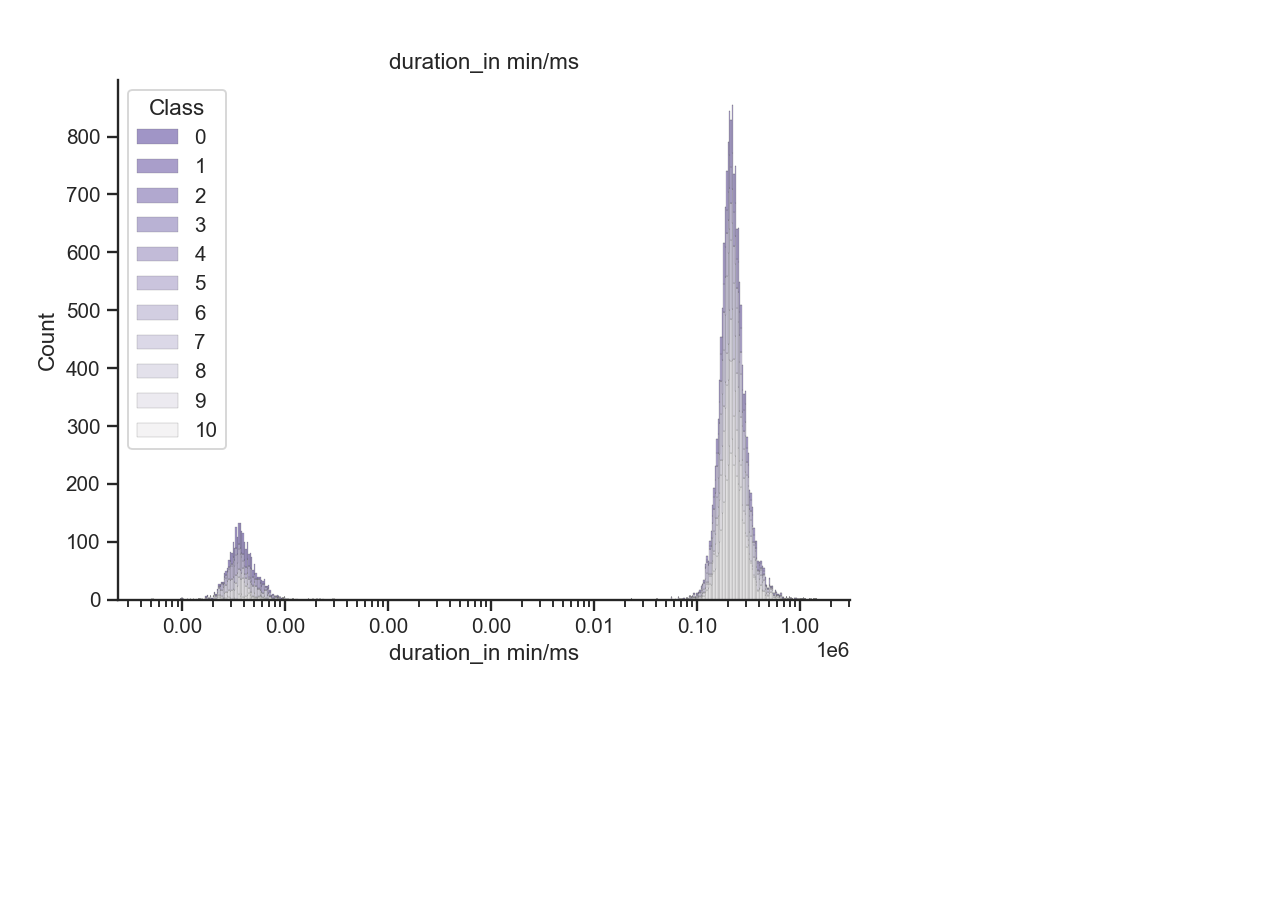

<IPython.core.display.Javascript object>

In [34]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in range(1,15):
    if(i in [6,8]):
        continue
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)
    sns.histplot(dataset,
    x=list(dataset)[i], hue="Class",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=0.1,
    log_scale=True,
    ).set_title(list(dataset)[i])
    ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


In [10]:
correlacio = dataset.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlacio, annot=True,linewidths=.5, ax=ax)
fig.tight_layout()

<IPython.core.display.Javascript object>

In [11]:
sns.pairplot(dataset)

<IPython.core.display.Javascript object>

In [11]:
fig, ax=plt.subplots()
plt.hist(list(y))
fig.tight_layout()

<IPython.core.display.Javascript object>

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop(["Class"], axis = 1).values
y = dataset["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier

model1 = OneVsOneClassifier(LogisticRegression())
model1.fit(X_train, y_train)
print("Score:")
print(model1.score(X_test, y_test))

model2 = OneVsRestClassifier(LogisticRegression())
model2.fit(X_train, y_train)
print("Score:")
print(model2.score(X_test, y_test))

model3 = OutputCodeClassifier(LogisticRegression())
model3.fit(X_train, y_train)
print("Score:")
print(model3.score(X_test, y_test))

Score:
0.5119444444444444
Score:
0.5025
Score:
0.4113888888888889


In [105]:
from sklearn import neighbors
accuracy=[]
accuracy_w=[]
n_neighbors=[]
for i in range(1,100,2):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))
    knn=neighbors.KNeighborsClassifier(n_neighbors=i,weights="distance")
    knn.fit(X_train, y_train)
    accuracy_w.append(knn.score(X_test, y_test))
    n_neighbors.append(i)

In [106]:
print('Max Accuracy uniform:')
print(max(accuracy))
print('Number of neighbors:')
print(n_neighbors[accuracy.index(max(accuracy))])
print('Max Accuracy distance weight points:')
print(max(accuracy_w))
print('Number of neighbors:')
print(n_neighbors[accuracy_w.index(max(accuracy_w))])


Max Accuracy uniform:
0.5008333333333334
Number of neighbors:
45
Max Accuracy distance weight points:
0.4577777777777778
Number of neighbors:
95


In [118]:
model4=neighbors.KNeighborsClassifier(n_neighbors=accuracy.index(max(accuracy))).fit(X_train,y_train)
model5=neighbors.KNeighborsClassifier(n_neighbors=accuracy_w.index(max(accuracy_w)),weights="distance").fit(X_train,y_train)

In [119]:
plt.figure()
plt.title("Accuracy vs n_neigbors")
plt.axis(ymin=0.25, ymax=0.52)
plt.plot(n_neighbors,accuracy, c="green")
plt.plot(n_neighbors,accuracy_w, c="red");

<IPython.core.display.Javascript object>

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)
print(model6.score(X_test, y_test))

0.37722222222222224


In [45]:
list_of_correlations=list(correlacio["Class"])[:-1]
list_of_correlations

NameError: name 'correlacio' is not defined

In [121]:
def score_without10(model,X_test,y_test):
    count=0
    count_valid=0
    correct=0
    predicted_y=model.predict(X_test)
    for y in y_test:
        if(y!=10):
            count_valid+=1
            if(y==predicted_y[count]):
                correct+=1
        count+=1
    return(correct/count_valid)

In [122]:
def Average(lst):
    return sum(lst) / len(lst)

In [123]:
import statistics
def Median(lst):
    return(statistics.median(lst))

In [124]:
def score_per_class(model,X_test,y_test):
    matrix = confusion_matrix(list(y_test), list(model.predict(X_test)))
    return((matrix.diagonal()/matrix.sum(axis=1)).tolist())

In [125]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 16),
              "min_samples_leaf": randint(1, 100),
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"]}


In [127]:
rf = DecisionTreeClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 4000, cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 4000 candidates, totalling 12000 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=4000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F1B66AB790>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F1B66AB400>,
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [129]:
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 14,
 'min_samples_leaf': 42,
 'splitter': 'best'}

In [130]:
model7=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= None,
 max_features= 14,
 min_samples_leaf=42,
 splitter= "best").fit(X_train,y_train)
model7.score(X_test,y_test)

0.4855555555555556

In [134]:
from sklearn.metrics import f1_score
models=[model1,model2,model3,model4,model5,model6,model7]
Averages=[]
Medians=[]
ScoresWO10=[]
scores_per_class=[]
F1=[]
for model in models:
    print(str(namestr(model, globals())[0]))
    print(score_per_class(model,X_test,y_test))
    scores_per_class.append(score_per_class(model,X_test,y_test))
    print(" ")
    print("Average Score:")
    print(Average(score_per_class(model,X_test,y_test)))
    Averages.append(Average(score_per_class(model,X_test,y_test)))
    print(" ")
    print("Median score:")
    print(Median(score_per_class(model,X_test,y_test)))
    Medians.append(Median(score_per_class(model,X_test,y_test)))
    print(" ")
    print("Score without label 10:")
    print(score_without10(model,X_test,y_test))
    ScoresWO10.append(score_without10(model,X_test,y_test))
    print(" ")
    print("F1 score (macro):")
    print(f1_score(y_test,model.predict(X_test),average="macro"))
    F1.append(f1_score(y_test,model.predict(X_test),average="macro"))
    print(" ")

model1
[0.7651515151515151, 0.0, 0.30451127819548873, 0.6506024096385542, 0.4936708860759494, 0.6604938271604939, 0.22762645914396887, 0.8983050847457628, 0.5072886297376094, 0.5330739299610895, 0.7048503611971104]
 
Average Score:
0.5223249437279585
 
Median score:
0.5330739299610895
 
Score without label 10:
0.4408969973394147
 
F1 score (macro):
0.5211160242004659
 
model2
[0.6742424242424242, 0.0, 0.2894736842105263, 0.6385542168674698, 0.5569620253164557, 0.6666666666666666, 0.22762645914396887, 0.9322033898305084, 0.5102040816326531, 0.44357976653696496, 0.7223942208462333]
 
Average Score:
0.5147188122994429
 
Median score:
0.5569620253164557
 
Score without label 10:
0.42151273280121626
 
F1 score (macro):
0.5119568333455615
 
model3
[0.5909090909090909, 0.0, 0.15413533834586465, 0.1566265060240964, 0.0, 0.5555555555555556, 0.05642023346303502, 0.7966101694915254, 0.3177842565597668, 0.4163424124513619, 0.7461300309597523]
 
Average Score:
0.3445921448872772
 
Median score:
0.3

In [132]:
print(Averages.index(max(Averages)))
print(max(Averages))
print(Medians.index(max(Medians)))
print(max(Medians))
print(ScoresWO10.index(max(ScoresWO10)))
print(max(ScoresWO10))
print(F1.index(max(F1)))
print(max(F1))

0
0.5223249437279585
1
0.5569620253164557
0
0.4408969973394147
0
0.5211160242004659


<IPython.core.display.Javascript object>


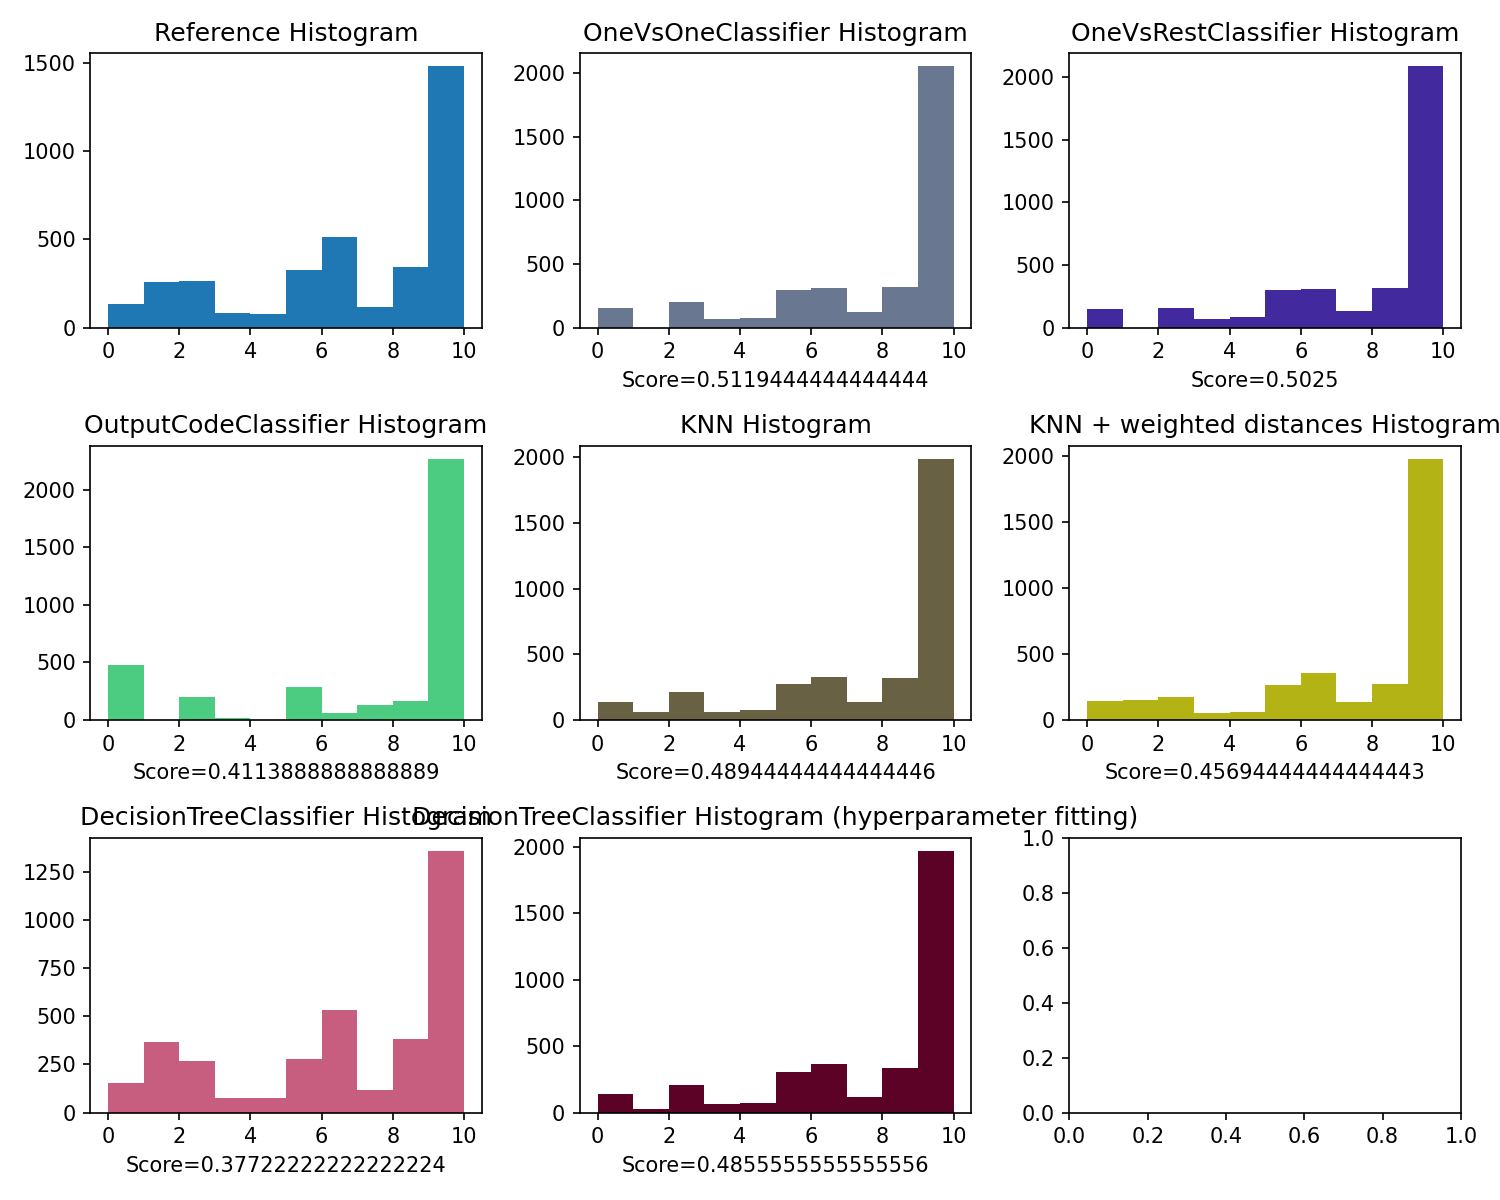

In [151]:
fig, matrix = plt.subplots(3,3, figsize=(10,8))
matrix[0][0].hist(list(y_test))
matrix[0][0].set_title("Reference Histogram")
matrix[0][1].hist(model1.predict(X_test),color=list(np.random.rand(3,)))
matrix[0][1].set_title("OneVsOneClassifier Histogram")
matrix[0][1].set_xlabel('Score='+str(model1.score(X_test,y_test)))
matrix[0][2].hist(model2.predict(X_test),color=list(np.random.rand(3,)))
matrix[0][2].set_title("OneVsRestClassifier Histogram")
matrix[0][2].set_xlabel('Score='+str(model2.score(X_test,y_test)))
matrix[1][0].hist(model3.predict(X_test),color=list(np.random.rand(3,)))
matrix[1][0].set_title("OutputCodeClassifier Histogram")
matrix[1][0].set_xlabel('Score='+str(model3.score(X_test,y_test)))
matrix[1][1].hist(model4.predict(X_test),color=list(np.random.rand(3,)))
matrix[1][1].set_title("KNN Histogram")
matrix[1][1].set_xlabel('Score='+str(model4.score(X_test,y_test)))
matrix[1][2].hist(model5.predict(X_test),color=list(np.random.rand(3,)))
matrix[1][2].set_title("KNN + weighted distances Histogram")
matrix[1][2].set_xlabel('Score='+str(model5.score(X_test,y_test)))
matrix[2][0].hist(model6.predict(X_test),color=list(np.random.rand(3,)))
matrix[2][0].set_title("DecisionTreeClassifier Histogram")
matrix[2][0].set_xlabel('Score='+str(model6.score(X_test,y_test)))
matrix[2][1].hist(model7.predict(X_test),color=list(np.random.rand(3,)))
matrix[2][1].set_title("DecisionTreeClassifier Histogram (hyperparameter fitting)")
matrix[2][1].set_xlabel('Score='+str(model7.score(X_test,y_test)))
plt.tight_layout()

<IPython.core.display.Javascript object>


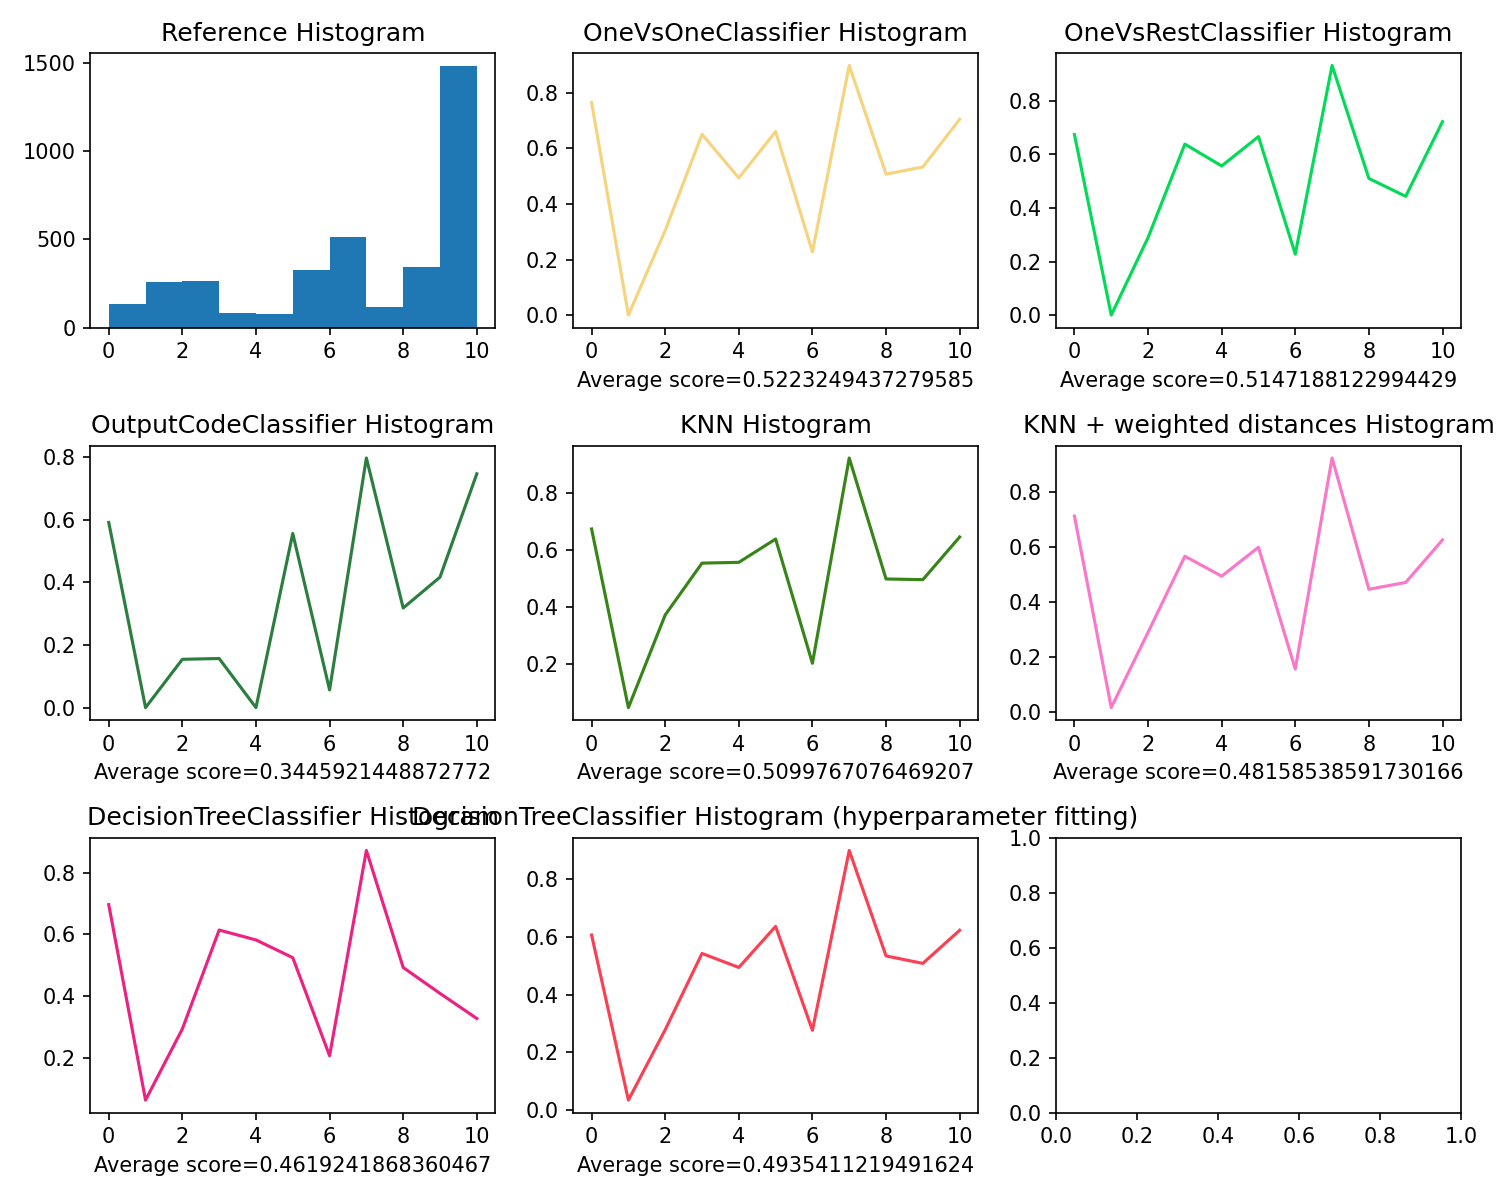

In [157]:
fig, matrix = plt.subplots(3,3, figsize=(10,8))
matrix[0][0].hist(list(y_test))
matrix[0][0].set_title("Reference Histogram")
matrix[0][1].plot(scores_per_class[0], c=list(np.random.rand(3,)))
matrix[0][1].set_title("OneVsOneClassifier Histogram")
matrix[0][1].set_xlabel('Average score='+str(Averages[0]))
matrix[0][2].plot(scores_per_class[1], c=list(np.random.rand(3,)))
matrix[0][2].set_title("OneVsRestClassifier Histogram")
matrix[0][2].set_xlabel('Average score='+str(Averages[1]))
matrix[1][0].plot(scores_per_class[2], c=list(np.random.rand(3,)))
matrix[1][0].set_title("OutputCodeClassifier Histogram")
matrix[1][0].set_xlabel('Average score='+str(Averages[2]))
matrix[1][1].plot(scores_per_class[3], c=list(np.random.rand(3,)))
matrix[1][1].set_title("KNN Histogram")
matrix[1][1].set_xlabel('Average score='+str(Averages[3]))
matrix[1][2].plot(scores_per_class[4], c=list(np.random.rand(3,)))
matrix[1][2].set_title("KNN + weighted distances Histogram")
matrix[1][2].set_xlabel('Average score='+str(Averages[4]))
matrix[2][0].plot(scores_per_class[5], c=list(np.random.rand(3,)))
matrix[2][0].set_title("DecisionTreeClassifier Histogram")
matrix[2][0].set_xlabel('Average score='+str(Averages[5]))
matrix[2][1].plot(scores_per_class[6], c=list(np.random.rand(3,)))
matrix[2][1].set_title("DecisionTreeClassifier Histogram (hyperparameter fitting)")
matrix[2][1].set_xlabel('Average score='+str(Averages[6]))
plt.tight_layout()